In [207]:
#How to import machine learning data in jupyter

In [208]:
from sklearn import datasets

In [209]:
iris_dataset = datasets.load_iris()

In [210]:
x = iris_dataset.data[:, :2]

In [211]:
x_count = len(X.flat)
x_min = X[:,0].min() - .5
x_max = X[:, 0].max() + .5
x_count = X[:, 0].mean()

In [212]:
x_count, x_min, x_max, x_mean

(5.843333333333334, 3.8, 8.4, 5.843333333333334)

In [213]:
#Check The version of libraries
#Python version
import sys
print('python {}'.format(sys.version))
#scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
#numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
#matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
#pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
#scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

python 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
scipy: 1.8.0
numpy: 1.26.4
matplotlib: 3.8.3
pandas: 2.2.2
sklearn: 1.5.2


In [214]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [215]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'patel-length', 'petal-width', 'class']


In [216]:
dataset = pandas.read_csv(url, names = names)

In [217]:
print(dataset.shape)

(150, 5)


In [218]:
print(dataset.head(30))  #First 30 samples of dataset

    sepal-length  sepal-width  patel-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [219]:
print(dataset.describe()) #To calculate count, mean, standard devition, min, max, percentile.

       sepal-length  sepal-width  patel-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [220]:
print(dataset.groupby('class').size()) #Find the size of each class.

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [221]:
#Visualization through plot

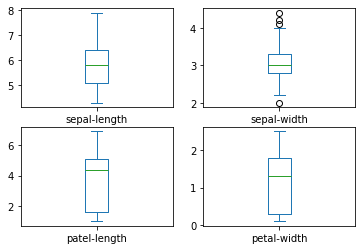

In [222]:
dataset.plot(kind="box", subplots= True, layout=(2,2), sharex = False, sharey = False)
plt.show()

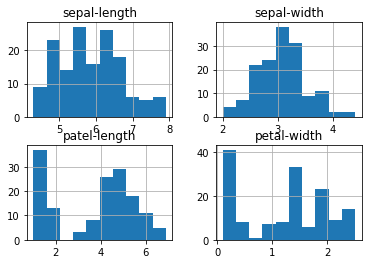

In [223]:
dataset.hist()   #Histogram plot
plt.show()

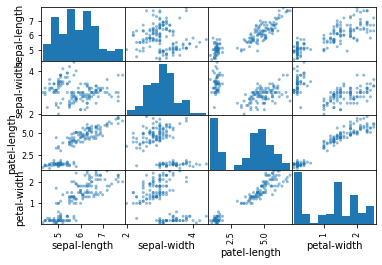

In [224]:
scatter_matrix(dataset)   #scatter plot or scatter matrix
plt.show()

In [225]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 6
X_train, X_test, Y_train, Y_test, = model_selection. train_test_split(X, Y, test_size = validation_size, random_state=seed)

In [226]:
seed=6
scoring = 'accuarcy'

In [227]:
#Model Building
#Spot check Algorithms
models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDR', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [228]:
#Evaluate each model in true
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s:%f(%f)"%(name,cv_results.mean(), cv_results.std())
    print(msg)

LR:0.958333(0.041667)
LDR:0.975000(0.038188)
KNN:0.958333(0.041667)
CART:0.933333(0.050000)
NB:0.966667(0.040825)
SVM:0.941667(0.053359)





One Way to Plot the Figures to Compare the Results of Different Models



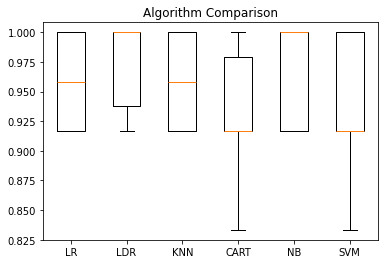

In [229]:
#PLOTTING THE FIGURES
print('\n\n\nOne Way to Plot the Figures to Compare the Results of Different Models\n')
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()


Another Way to Plot the Figures to Compare the Results of Different Models



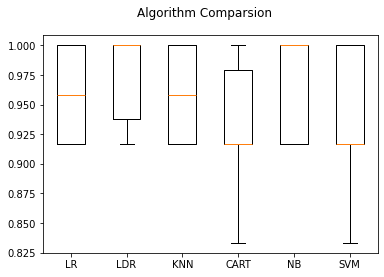

In [230]:
#COMPARING EACH ALGORITHM
print('\nAnother Way to Plot the Figures to Compare the Results of Different Models\n')
fig = plt.figure()
fig.suptitle('Algorithm Comparsion')
ax = fig.add_subplot (111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [231]:
#MAKE PREDICTIONS ON VALIDATION DATASETS
#MAKE PREDICTIONS USING KNN
from sklearn.model_selection import train_test_split

# Assuming your data is in variables 'X' (features) and 'y' (target)

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=42) 

print('\nMake Predictions Using KNN')
knn= KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print('\nKNN Accuracy Score: ', accuracy_score(Y_validation, predictions))
print('\nKNN Confusion Matrix: \n', confusion_matrix(Y_validation, predictions))
print('\nKNN Classification Report: \n', classification_report(Y_validation, predictions))


Make Predictions Using KNN

KNN Accuracy Score:  1.0

KNN Confusion Matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

KNN Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [232]:
# Import necessary modules 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris 
import numpy as np 
import matplotlib.pyplot as plt 

# Loading data 
irisData = load_iris() 
  
# Create feature and target arrays 
X = irisData.data 
y = irisData.target 
  
# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42) 
  
knn = KNeighborsClassifier(n_neighbors=7) 
  
knn.fit(X_train, y_train) 
  
# Predict on dataset which model has not seen before 
print(knn.predict(X_test)) 

[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [233]:
# Loading data 
irisData = load_iris() 

# Create feature and target arrays 
X = irisData.data 
y = irisData.target 

# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
			X, y, test_size = 0.2, random_state=42) 

knn = KNeighborsClassifier(n_neighbors=7) 

knn.fit(X_train, y_train) 

# Calculate the accuracy of the model 
print(knn.score(X_test, y_test)) 


0.9666666666666667


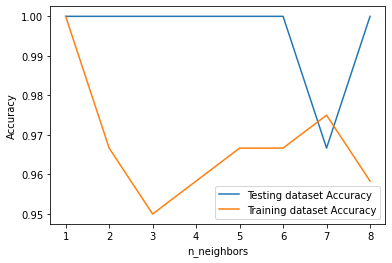

In [234]:
irisData = load_iris() 

# Create feature and target arrays 
X = irisData.data 
y = irisData.target 

# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
			X, y, test_size = 0.2, random_state=42) 

neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 

# Loop over K values 
for i, k in enumerate(neighbors): 
	knn = KNeighborsClassifier(n_neighbors=k) 
	knn.fit(X_train, y_train) 
	
	# Compute training and test data accuracy 
	train_accuracy[i] = knn.score(X_train, y_train) 
	test_accuracy[i] = knn.score(X_test, y_test) 

# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 

plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 
